In [1]:
from sklearn import linear_model
import sklearn
import json
from matplotlib import pyplot as plt
from collections import defaultdict
import numpy
import random
import gzip
import math
import string
import scipy
from scipy import sparse
from implicit import bpr
import tensorflow as tf
from collections import defaultdict

import gzip
from collections import defaultdict
import re
import datetime

from typing import List


c:\Users\traip\OneDrive\Desktop\CSEstuff\CSE_158\assignment_2\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)

def readCSV(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        u,b,r = l.strip().split(',')
        r = int(r)
        yield u,b,r


def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield eval(l)


In [3]:
# steam_reviews_data = []
user_reviews_data = []
user_libraries_data = []
# bundle_data = []
games_data = []

# with gzip.open("steam_reviews.json.gz") as file:
#     """
#     Each line is 1 review, no recommendations  
#     """
#     for l in file:
#         d = eval(l)
#         steam_reviews_data.append(d)
#         if len(steam_reviews_data) >= 60000:
#             break

with gzip.open("australian_user_reviews.json.gz") as file:
    """
    {user_id: int, user_url: str, reviews: list[{funny: bool, posted: str, last_edited: str, item_id: int, helpful: int, recommend: Bool, review: str}]}
    
    Gives a list of user and all their reviews, within the review it shows how if the review was funny, the date, how helpful, the recommendation, and review 
    """
    for l in file:
        d = eval(l)
        user_reviews_data.append(d)
        if len(user_reviews_data) >= 60000:
            break

with gzip.open("australian_users_items.json.gz") as file:
    """
    {user_id: int, items_count: int, steam_id: int, user_url: str, items: list[{item_id: int, item_name: str, playtime_forever: int, playtime_2weeks: 0}]}
    
    Contains data of existing games user have in their library and their playtime
    
    """
    for l in file:
        d = eval(l)
        if len(d['items']) == 0: continue
        user_libraries_data.append(d)
        if len(user_libraries_data) >= 60000:
            break

# with gzip.open("bundle_data.json.gz") as file:
#     for l in file:
#         d = eval(l)
#         bundle_data.append(d)
#         if len(bundle_data) >= 60000:
#             break

with gzip.open("steam_games.json.gz") as file:
    """
    {'publisher': str, u'genres': list[str], u'app_name': str, u'title': str, u'url': str, u'release_date': str, u'tags': list[str], u'discount_price': float, u'reviews_url': str, u'specs': list[str], u'price': float, u'early_access': bool, u'id': str, u'developer': str" }

    Gives all information about the game suchas genre/tags, name, release-data, price/discount_price, review_url, early access
    :ISSUE: Release date isn't always of format "YYYY-mm-dd"
    """
    for l in file:
        d = eval(l)
        games_data.append(d)
        if len(games_data) >= 60000:
            break


In [4]:
# Print statements
# print(f"steam reivew: {steam_reviews_data[8]} \n")
print(f"user reivew: {user_reviews_data[0]} \n")
print(f"user library: {user_libraries_data[12]} \n")
# print(f"bundle data: {bundle_data[0]} \n")
print(f"game: {games_data[0]} \n")

user reivew: {'user_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'reviews': [{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'}, {'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': "It's unique and worth a playthrough."}, {'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do 

In [5]:
# print(f"steam review len: {len(steam_reviews_data)} \n")
print(f"user review len: {len(user_reviews_data)} \n")
print(f"user library: {len(user_libraries_data)} \n")
# print(f"bundle: {len(bundle_data)} \n")
print(f"game len: {len(games_data)} \n")

user review len: 25799 

user library: 60000 

game len: 32135 



In [6]:
# get data structure
"List of genres"
genre_list = set() 
"Set of users and their reviews"
user_to_reviews = defaultdict(list)
for user in user_reviews_data:
    user_to_reviews[user["user_id"]] = user['reviews']
"List of user, and their amount of games in their library, and their number of recommended reviews"
user_rec_games = defaultdict(list)
for game in games_data:
    try:
        for genre in game['genres']:
            genre_list.add(genre)
    except:
        for genre in game['tags']:
            genre_list.add(genre)
    finally:
        continue

for user in user_libraries_data:
    total_num = user['items_count']
    u_id = user['user_id']
    if u_id in user_rec_games:
        continue
    if u_id in user_to_reviews:
        rec_count = 0
        for rev in user_to_reviews[u_id]:
            if rev['recommend']:
                rec_count += 1
        user_rec_games[u_id].append((total_num, rec_count))
    else:
        user_rec_games[u_id].append((total_num, 0))




In [ ]:
print(f"genres: {genre_list} \n")
print(f"user_to review {len(user_to_reviews)} \n")
print(f"user_rec: {len(user_rec_games)} \n")


## PLot 1 
This plot demonstrates how many recommendations a user would give based on the amount of games they have. From this plot, we can conclude that users don't give out much recommendations for the games that they own. This will help me understand the relationship between the games that a user own and his/her likelihood to recommend the game

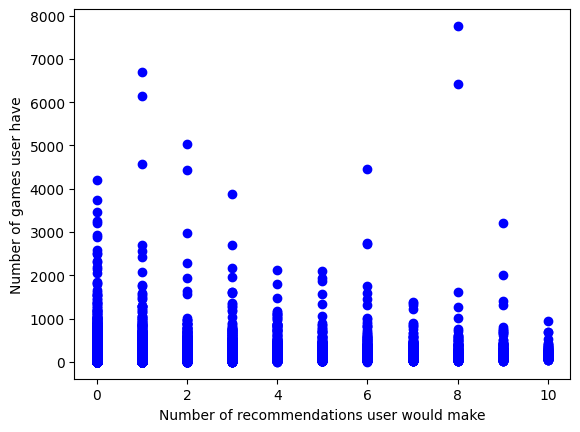

In [7]:
# # recommendation vs # games user have
x_num_games = []
y_num_rec = []
for l in user_rec_games.values():
    x_num_games.append(l[0][0])
    y_num_rec.append(l[0][1])

plt.plot(y_num_rec, x_num_games, 'bo', label="# Games Owned vs # Rec.",)
plt.xlabel("Number of recommendations user would make")
plt.ylabel("Number of games user have")
plt.show()


## PLot 2

In [ ]:
# data structure
gameReleaseDate = {}
usersPerGame = defaultdict(set)

format = "%Y-%m-%d"
for game in games_data:
    try:
        id = game['id']
        release_str = game['release_date']                          # some are missing release dates
        if bool(datetime.datetime.strptime(release_str, format)):
            gameReleaseDate[id] = game['release_date']
    except:
        continue

for user in user_libraries_data:
    for game in user['items']:
        usersPerGame[game['item_id']].add((user['user_id'], game['playtime_forever']))


In [11]:
print(f"game release: {len(gameReleaseDate)}")
print(f"usersPergame: {len(usersPerGame)}")


game release: 29781
usersPergame: 10972


In [9]:
# game data of (date, game_id, number of users who owns the game)
sort_date_data = []
for g_id, date in gameReleaseDate.items():
    sort_date_data.append((date, g_id, len(usersPerGame[g_id])))
sort_date_data.sort()
print(sort_date_data[:10])

[('1970-07-15', '734030', 0), ('1970-12-16', '582750', 0), ('1975-12-31', '734220', 0), ('1980-01-01', '579610', 0), ('1981-01-01', '579680', 0), ('1981-01-01', '614510', 0), ('1981-04-22', '755200', 0), ('1982-01-01', '571920', 0), ('1982-05-21', '396130', 0), ('1982-12-31', '738200', 0)]


In [10]:
# Plot game age vs # owned copies
x_rel_date = []
y_num_owned = []
for (d, id, g_num) in sort_date_data:
    x_rel_date.append(d)
    y_num_owned.append(g_num)

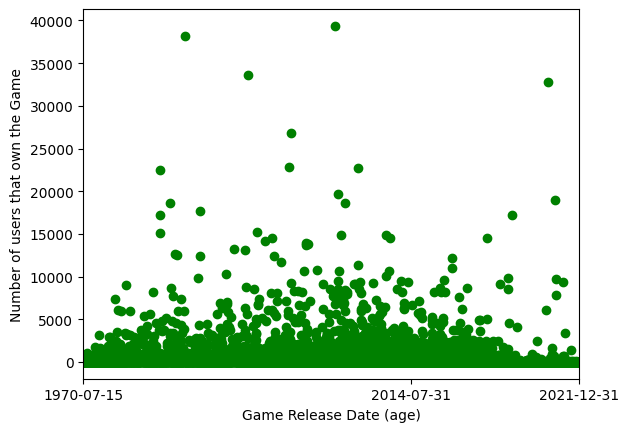

In [13]:
ind_incr = len(x_rel_date)//4
plt.plot_date(x_rel_date, y_num_owned, 'go', label="Release date(age) vs number who owns")
plt.xticks([x_rel_date[0],x_rel_date[ind_incr-500], x_rel_date[-1]])
plt.xlim(x_rel_date[0], x_rel_date[-1])
plt.ylabel("Number of users that own the Game")
plt.xlabel("Game Release Date (age)")
plt.show()

# Plot 3: # price vs playtime 

In [14]:
# Get data structure
priceToGame = defaultdict(int) # price of game
playtimePerGame = defaultdict(list) # all playtime of game
for game in games_data:
    try:
        playtimes = []
        if "free" in str(game['price']).lower():
            priceToGame[game['id']] = 0
        if type(game['price']) is float:
            priceToGame[game['id']] = game['price']
        else:
            continue
        for tup in usersPerGame[game['id']]:
            playtimes.append(tup[1])
        playtimePerGame[game['id']] = playtimes
    except:
        continue

In [15]:
sort_price_playtime = []
for g_id in priceToGame:
    if len(playtimePerGame[g_id]) == 0: sort_price_playtime.append((priceToGame[g_id], 0))
    else: sort_price_playtime.append((priceToGame[g_id], sum(playtimePerGame[g_id])//len(playtimePerGame[g_id])))

sort_price_playtime.sort()

In [16]:
# plot 3 get all prices(x) and get total playtime(y) per game
x_price = []
y_total_playtime = []
for (p, n) in sort_price_playtime:
    if p > 100: continue
    x_price.append(p)
    y_total_playtime.append(n)

print(x_price[-1])
print(y_total_playtime[0])

99.99
0


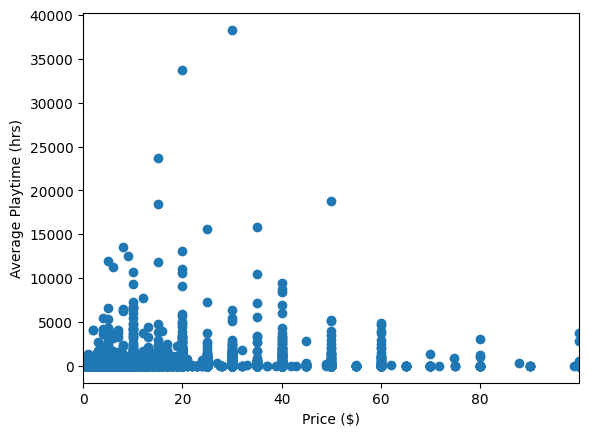

In [17]:
ind_incr = len(x_price)//4
plt.scatter(x_price, y_total_playtime, label="Price vs playtime")
# plt.xticks([x_price[0], x_price[ind_incr], x_price[ind_incr*2], x_price[ind_incr*3]])
plt.xlim(x_price[0], x_price[-1])
plt.xlabel("Price ($)")
plt.ylabel("Average Playtime (hrs)")
plt.show()

In [18]:
# official data structures 
reviewsPerUser = defaultdict(list)
gamesPerUser = defaultdict(list)
gameProperties = {}
for rev in user_reviews_data:
    try:
        reviewsPerUser[rev['user_id']] = rev
    except: continue

for lib in user_libraries_data:
    try:
        gamesPerUser[lib['user_id']] = lib
    except: continue

for game in games_data:
    try: gameProperties[game['id']] = game
    except: continue
    



# Plot 4
Genre vs the number of recommendations associated

In [19]:
# for each genre, get the total number of recommendations
genreToRec = defaultdict(int)

for genre in genre_list:
    genreToRec[genre] = 0
    for val in reviewsPerUser.values():
        try:
            for rev in val['reviews']:
                try:
                    if rev['recommend']:
                        if genre in gameProperties[rev['item_id']]['genres'] or genre in gameProperties[rev['item_id']]['tags']:
                            genreToRec[genre] += 1
                except: continue
        except: continue



In [20]:
sort_genreToRec = []
for g, r in genreToRec.items():
    sort_genreToRec.append((r, g))

sort_genreToRec.sort(reverse=True)
sort_genreToRec = sort_genreToRec[:30]
print(sort_genreToRec[0])


(39538, 'Action')


In [21]:
x_genres = []
y_rec = []
for (r,g) in sort_genreToRec:
    x_genres.append(g)
    y_rec.append(r)

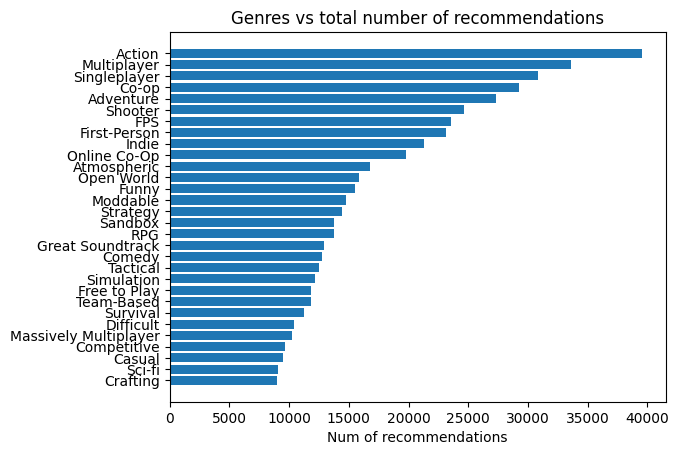

In [22]:
# plot
y_pos = numpy.arange(len(sort_genreToRec))
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, y_rec, align='center')
ax.set_yticks(y_pos, labels=x_genres)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Num of recommendations')
ax.set_title('Genres vs total number of recommendations')

plt.show()


In [77]:
# Print statements
# print(f"steam reivew: {steam_reviews_data[8]} \n")
print(f"user reivew: {user_reviews_data[0]} \n")
print(f"user library: {user_libraries_data[12]} \n")
# print(f"bundle data: {bundle_data[0]} \n")
print(f"game: {games_data[0]} \n")


user reivew: {'user_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'reviews': [{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'}, {'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': "It's unique and worth a playthrough."}, {'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do 

In [89]:
# get the max number of recommendationfrom user
max_rec = 0
for val in reviewsPerUser.values():
    try: 
        rec_count = 0
        for rev in val['reviews']:
            if rev['recommend']:
                rec_count += 1
        if max_rec < rec_count:
            max_rec = rec_count
    except: continue

print(f"max_rec: {max_rec}") # 10

In [ ]:
# # recommended vs # total hours played

# for every genre, get number of hours played per day of a week

# game age vs # of recommendation

# game age vs # avg(or total) playtime



# part 2 & Part 3


In [24]:
reviewsPerUser = defaultdict(list)
gamesPerUser = defaultdict(set)
usersPerGame = defaultdict(set)
gameProperties = {}

for rev in user_reviews_data:
    try:
        reviewsPerUser[rev['user_id']] = rev
    except:
        continue

for lib in user_libraries_data:
    try:
        for game in lib['items']:
            gamesPerUser[lib['user_id']].add(game['item_id'])
    except:
        continue

for game in games_data:
    try:
        gameProperties[game['id']] = game
    except: continue

for user in user_libraries_data:
    for game in user['items']:
        usersPerGame[game['item_id']].add(user['user_id'])


# Similarity Based Model

In [34]:
gamesPerUser_train = defaultdict(set)
gamesPerUser_test = defaultdict(set)
usersPerGame_train = defaultdict(set)
usersPerGame_test = defaultdict(set)

for u, g_set in gamesPerUser.items():
    g_list = list(g_set)
    gamesPerUser_train[u] = set(g_list[:len(g_list)//2])
    gamesPerUser_test[u] = set(g_list[len(g_list)//2:])
    # for game in games_data:
    #     if len(gamesPerUser_test[u]) == len(gamesPerUser[u]): break # only add until the actual size 
    #     try:
    #         # Add games that user have not played before
    #         if game['id'] in gamesPerUser[u]: continue
    #         else: gamesPerUser_test[u].add(game['id'])
    #     except: continue

for g, u_set in usersPerGame.items():
    u_list = list(u_set)
    usersPerGame_train[g] = set(u_list[:len(u_list)//2])
    usersPerGame_test[g] = set(u_list[len(u_list)//2:])


In [35]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom


In [40]:
# return the most similar item
def mostSimilar(i, N=10):
    similarities = []
    users = usersPerGame[i]
    max_sim = 0
    most_sim_game = ""
    for i2 in usersPerGame:
        if i2 == i:
            continue
        sim = Jaccard(users, usersPerGame[i2])
        # sim = Pearson(i, i2) # Could use alternate similarity metrics straightforwardly
        if max_sim < sim:
            max_sim = sim
            most_sim_game = i2
        similarities.append((sim, i2))
    similarities.sort(reverse=True)
    return most_sim_game


In [ ]:
# Validation 
userToAcc = {}
for u in gamesPerUser_train:
    corr = 0
    for g in gamesPerUser_train[u]:
        # rec_games = mostSimilar(g)
        # most_sim_game = ""
        # for game in rec_games:
        #     if game in gamesPerUser_train[u]: continue
        #     else:
        #         most_sim_game = game
        #         break
        # if most_sim_game in gamesPerUser_test[u]: 
        #     corr += 1
        rec_game = mostSimilar(g)
        if rec_game in gamesPerUser_test[u]:
            corr += 1
    acc = corr/len(gamesPerUser_test)
    userToAcc[u] = acc
    # print(f"user: {u}, accuracy: {acc} ")


# baseline

In [95]:
# game of a certain genre with most reviews
genre_count = {}

for d in user_reviews_data:
    for rev in d['reviews']:
        g_id = rev['item_id']
        game_genres = []
        if not rev['recommend']: # add this line to count only recommended games
            continue
        if g_id not in gameProperties:
            continue
        if 'genres' not in gameProperties[g_id] and 'tags' not in gameProperties[g_id]:
            continue
        elif 'genres' in gameProperties[g_id]:
            game_genres += gameProperties[g_id]['genres']
        elif 'tags' in gameProperties[g_id]:
            game_genres += gameProperties[g_id]['tags']
        else:
            game_genres = gameProperties[g_id]['genres'] + gameProperties[g_id]['tags']
        for gen in game_genres:
            if gen not in genre_count:
                genre_count[gen] = {}
            if g_id not in genre_count[gen]:
                genre_count[gen][g_id] = 1
            else:
                genre_count[gen][g_id] += 1
            

In [96]:
# get the most recommended game for each genre
top_rec_gamePerGenre = {}
for gen in genre_count:
    sort_genre_game = []
    for g_id, cnt in genre_count[gen].items():
        sort_genre_game.append((cnt, g_id))
    sort_genre_game.sort(reverse=True)
    top_rec_gamePerGenre[gen] = sort_genre_game[0][1]

In [97]:
# Highest owning game and highest recommend game
topOwnGame = ""
gameOwnCount = {}
for user in user_libraries_data:
    for game in user['items']:
        if game['item_id'] not in gameOwnCount:
            gameOwnCount[game['item_id']] = {}
        if 'count' not in gameOwnCount[game['item_id']]:
            gameOwnCount[game['item_id']]['count'] = 1
        else:
            gameOwnCount[game['item_id']]['count'] += 1
        gameOwnCount[game['item_id']]['name'] = game['item_name']
sort_gameOwnCount = []
for g, cnt in gameOwnCount.items():
    sort_gameOwnCount.append((cnt['count'], g, cnt['name']))

sort_gameOwnCount.sort(reverse=True)
topOwnGame = sort_gameOwnCount[0][1]



In [78]:
print(f"top own game = {sort_gameOwnCount[0][2]}")


top own game = Dota 2 Test


In [98]:
# get the top game genre that user owns
recPerUser = defaultdict(set)
for u, g_set in gamesPerUser_train.items():
    genre = defaultdict(int)
    for g in g_set:
        genres = []
        if g not in gameProperties:
            continue
        if 'genres' not in gameProperties[g] and 'tags' not in gameProperties[g]:
            continue
        elif 'genres' in gameProperties[g]:
            genres += gameProperties[g]['genres'] 
        elif 'tags' in gameProperties[g]:
            genres += gameProperties[g]['tags']
        else:
            genres = gameProperties[g]['genres'] + gameProperties[g]['tags']

        for gen in genres:
            genre[gen] += 1
    genre_list_base = [(i,g) for g,i in genre.items()]
    genre_list_base.sort(reverse=True)
    # recommend the top game for that genre
    if len(genre_list_base) == 0:
        recPerUser[u] = topOwnGame
    else:
        # if top reviewed game exist in training dataset, then pick the next top genre
        for ind in range(len(genre_list_base)):
            if top_rec_gamePerGenre[genre_list_base[ind][1]] not in gamesPerUser_train[u]:
                recPerUser[u] = top_rec_gamePerGenre[genre_list_base[ind][1]]
                break
    

In [101]:
corr_cnt = []
for u in recPerUser:
    if recPerUser[u] in gamesPerUser_test[u]:
        corr_cnt.append(1)
    else:
        corr_cnt.append(0)

acc = sum(corr_cnt)/len(recPerUser)
print(f"acc: {acc}")

acc: 0.04213790894840634


# baseline pt 2 
- recommend next game within the top genre for the user

In [90]:
# get the ordered list of most reviewed game for each genre
top_rec_gamePerGenre = {}
for gen in genre_count:
    sort_genre_game = []
    for g_id, cnt in genre_count[gen].items():
        sort_genre_game.append((cnt, g_id))
    sort_genre_game.sort(reverse=True)
    top_rec_gamePerGenre[gen] = [sort_genre_game[ind][1] for ind in range(len(sort_genre_game))]


In [91]:
# get the top game genre that user owns
recPerUser = defaultdict(set)
for u, g_set in gamesPerUser_train.items():
    genre = defaultdict(int)
    for g in g_set:
        genres = []
        if g not in gameProperties:
            continue
        if 'genres' not in gameProperties[g] and 'tags' not in gameProperties[g]:
            continue
        elif 'genres' in gameProperties[g]:
            genres += gameProperties[g]['genres']
        elif 'tags' in gameProperties[g]:
            genres += gameProperties[g]['tags']
        else:
            genres = gameProperties[g]['genres'] + gameProperties[g]['tags']

        for gen in genres:
            genre[gen] += 1
    genre_list_base = [(i, g) for g, i in genre.items()]
    genre_list_base.sort(reverse=True)
    # recommend the top game for that genre
    if len(genre_list_base) == 0:
        recPerUser[u] = topOwnGame
    else:
        # if top reviewed game exist in training dataset, then pick the next game within the recommended list for that genre
        for g in top_rec_gamePerGenre[genre_list_base[0][1]]:
            if g not in gamesPerUser_train[u]:
                recPerUser[u] = g
                break

# Part 3 Model
- Try using the Bayesian ranking model
- Try incorporating features into the bayesian ranking model

In [4]:
reviewsPerUser = defaultdict(list)
gamesPerUser = defaultdict(set)
gamesPerUser_test = defaultdict(set)
gamesPerUser_train = defaultdict(set)
usersPerGame = defaultdict(set)
gameIdReviewsPerUser = {}
recReviewsPerUser = {}
gameProperties = {}

for rev in user_reviews_data:
    try:
        reviewsPerUser[rev['user_id']] = rev
        gameIdReviewsPerUser[rev['user_id']] = [r['item_id'] for r in rev['reviews']]
        recReviewsPerUser[rev['user_id']] = [r['recommend'] for r in rev['reviews']]
    except:
        continue
# get training and test set of 
for lib in user_libraries_data:
    try:
        for ind, game in enumerate(lib['items']):
            gamesPerUser[lib['user_id']].add(game['item_id'])
            if ind <= len(lib['items'])//2:
                gamesPerUser_train[lib['user_id']].add(game['item_id'])
            else:
                gamesPerUser_test[lib['user_id']].add(game['item_id'])
    except:
        continue

for game in games_data:
    try:
        gameProperties[game['id']] = game
    except:
        continue

for user in user_libraries_data:
    for game in user['items']:
        usersPerGame[game['item_id']].add(user['user_id'])


In [5]:
userIDs = {}
gameIDs = {}
interactions = []


for u, g_set in gamesPerUser_train.items():
    if u not in userIDs: userIDs[u] = len(userIDs)
    for g in g_set: 
        interactions.append((u, g, 0))

for g_set in gamesPerUser.values():
    for g in g_set:
        if g not in gameIDs: gameIDs[g] = len(gameIDs)

# for d in user_libraries_data:
#     try:
#         u = d['user_id']
#         for game in d['items']:
#             g = game['item_id']
#             if g not in gameIDs: gameIDs[g] = len(gameIDs)
#         if u not in userIDs: userIDs[u] = len(userIDs)
#         if u in gameIdReviewsPerUser:
#             for g_id in gameIDs:
#                 if g_id in gameIdReviewsPerUser[u]:
#                     index = gameIdReviewsPerUser[u].index(g_id)
#                     interactions.append((u,g_id, recReviewsPerUser[u][index] == True))
#                 else:
#                     interactions.append((u, g_id, 0))
#     except: continue

In [6]:
print(f"user: {len(userIDs)}")
print(f"game: {len(gameIDs)}")
print(f"interactions: {len(interactions)}")



user: 59409
game: 10973
interactions: 2453677


In [7]:
# doesn't use features
class BPRbatch(tf.keras.Model):
    def __init__(self, K, lamb):
        super(BPRbatch, self).__init__()
        # Initialize variables
        self.betaI = tf.Variable(tf.random.normal([len(gameIDs)],stddev=0.001))
        self.gammaU = tf.Variable(tf.random.normal([len(userIDs),K],stddev=0.001))
        self.gammaI = tf.Variable(tf.random.normal([len(gameIDs),K],stddev=0.001))
        # Regularization coefficient
        self.lamb = lamb

    # Prediction for a single instance
    def predict(self, u, i):
        p = self.betaI[i] + tf.tensordot(self.gammaU[u], self.gammaI[i], 1)
        return p

    # Regularizer
    def reg(self):
        return self.lamb * (tf.nn.l2_loss(self.betaI) +\
                            tf.nn.l2_loss(self.gammaU) +\
                            tf.nn.l2_loss(self.gammaI))
    
    def score(self, sampleU, sampleI):
        u = tf.convert_to_tensor(sampleU, dtype=tf.int32)
        i = tf.convert_to_tensor(sampleI, dtype=tf.int32)
        beta_i = tf.nn.embedding_lookup(self.betaI, i)
        gamma_u = tf.nn.embedding_lookup(self.gammaU, u)
        gamma_i = tf.nn.embedding_lookup(self.gammaI, i)
        x_ui = beta_i + tf.reduce_sum(tf.multiply(gamma_u, gamma_i), 1)
        return x_ui

    def call(self, sampleU, sampleI, sampleJ):
        x_ui = self.score(sampleU, sampleI)
        x_uj = self.score(sampleU, sampleJ)
        return -tf.reduce_mean(tf.math.log(tf.math.sigmoid(x_ui - x_uj)))

In [8]:
items = list(gameIDs.keys())
optimizer = tf.keras.optimizers.Adam(0.1)
modelBPR = BPRbatch(5, 0.00001)


In [67]:
print(len(items))

10973


In [9]:
def trainingStepBPR(model, interactions):
    Nsamples = 50000
    with tf.GradientTape() as tape:
        sampleU, sampleI, sampleJ = [], [], []
        for _ in range(Nsamples):
            u, i, _ = random.choice(interactions)  # positive sample
            j = random.choice(items)  # negative sample
            while j in gamesPerUser[u]:
                j = random.choice(items)
            sampleU.append(userIDs[u])
            sampleI.append(gameIDs[i])
            sampleJ.append(gameIDs[j])

        loss = model(sampleU, sampleI, sampleJ)
        loss += model.reg()
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients((grad, var) for
                              (grad, var) in zip(
                                  gradients, model.trainable_variables)
                              if grad is not None)
    return loss.numpy()


In [10]:
for i in range(100):
    obj = trainingStepBPR(modelBPR, interactions)
    if (i % 10 == 9): print("iteration " + str(i+1) + ", objective = " + str(obj))

iteration 10, objective = 0.29936424
iteration 20, objective = 0.23594534
iteration 30, objective = 0.21937262
iteration 40, objective = 0.20206866
iteration 50, objective = 0.190572
iteration 60, objective = 0.18418562
iteration 70, objective = 0.17599735
iteration 80, objective = 0.1734311
iteration 90, objective = 0.17196792
iteration 100, objective = 0.17024073


In [31]:
# create testing dataset that contains 3 True, and 3 False (50% was too uch data, causing overhead)
gamesPerUser_test_w_false = defaultdict(set)
for u in gamesPerUser_test:
    g_list = list(gamesPerUser_test[u])
    for ind, game in enumerate(g_list):
        if ind == 6: break
        gamesPerUser_test_w_false[u].add(game)
        g = random.choice(items)
        while g in gamesPerUser_test[u]:
            g = random.choice(items)
        gamesPerUser_test_w_false[u].add(g)

In [32]:
# make sure only a max of 4 games are in the test dataset
for ind, u in enumerate(gamesPerUser_test):
    if ind > 3: break
    print(f"{u} extra: {len(gamesPerUser_test_w_false[u])}, true: {len(gamesPerUser_test[u])}")
print(f"extra: {len(gamesPerUser_test_w_false)}")


76561197970982479 extra: 12, true: 138
js41637 extra: 12, true: 443
evcentric extra: 12, true: 68
Riot-Punch extra: 12, true: 163
extra: 56821


In [33]:
# make a prediction on the test dataset with video games that a use does not own
res_prediction = []
res_ds = defaultdict(set)
for ind_out, u in enumerate(gamesPerUser_test_w_false):
    preds = []
    for g in gamesPerUser_test_w_false[u]:
        pred = modelBPR.predict(userIDs[u], gameIDs[g]).numpy()
        preds.append((pred, g))
    preds.sort(reverse=True)
    for ind, (p, game) in enumerate(preds):
        if ind <= len(preds)//2:
            res_ds[u].add(game)
            res_prediction.append((u, game, 1))
        else:
            res_prediction.append((u, game, 0))
    if (ind_out % 100) == 1: print(f"at ind_out {ind_out}")



at ind_out 1
at ind_out 101
at ind_out 201
at ind_out 301
at ind_out 401
at ind_out 501
at ind_out 601
at ind_out 701
at ind_out 801
at ind_out 901
at ind_out 1001
at ind_out 1101
at ind_out 1201
at ind_out 1301
at ind_out 1401
at ind_out 1501
at ind_out 1601
at ind_out 1701
at ind_out 1801
at ind_out 1901
at ind_out 2001
at ind_out 2101
at ind_out 2201
at ind_out 2301
at ind_out 2401
at ind_out 2501
at ind_out 2601
at ind_out 2701
at ind_out 2801
at ind_out 2901
at ind_out 3001
at ind_out 3101
at ind_out 3201
at ind_out 3301
at ind_out 3401
at ind_out 3501
at ind_out 3601
at ind_out 3701
at ind_out 3801
at ind_out 3901
at ind_out 4001
at ind_out 4101
at ind_out 4201
at ind_out 4301
at ind_out 4401
at ind_out 4501
at ind_out 4601
at ind_out 4701
at ind_out 4801
at ind_out 4901
at ind_out 5001
at ind_out 5101
at ind_out 5201
at ind_out 5301
at ind_out 5401
at ind_out 5501
at ind_out 5601
at ind_out 5701
at ind_out 5801
at ind_out 5901
at ind_out 6001
at ind_out 6101
at ind_out 6201
at i

In [24]:
print(len(res_ds))

56821


In [35]:
# calculate the accuracy of the prediction by doing a set coparison
pred_total = 0
true_total = 0
for ind, u in enumerate(res_ds):
    diff = res_ds[u].difference(gamesPerUser_test[u])
    len_diff = len(diff)
    len_true = 6
    pred_total += len_diff
    true_total += len_true
    if (ind % 100) == 1: print(f"{ind}acc: {(len_true-len_diff)/len_true}")


1acc: 0.6666666666666666
101acc: 0.6666666666666666
201acc: 0.3333333333333333
301acc: 0.5
401acc: 0.6666666666666666
501acc: 0.6666666666666666
601acc: 0.6666666666666666
701acc: 0.6666666666666666
801acc: 0.8333333333333334
901acc: 0.6666666666666666
1001acc: 0.6666666666666666
1101acc: 0.6666666666666666
1201acc: 0.8333333333333334
1301acc: 0.6666666666666666
1401acc: 0.3333333333333333
1501acc: 0.6666666666666666
1601acc: 0.8333333333333334
1701acc: 0.6666666666666666
1801acc: 0.8333333333333334
1901acc: 0.5
2001acc: 0.8333333333333334
2101acc: 0.6666666666666666
2201acc: 0.5
2301acc: 0.6666666666666666
2401acc: 0.5
2501acc: 0.5
2601acc: 0.6666666666666666
2701acc: 0.5
2801acc: 0.8333333333333334
2901acc: 0.3333333333333333
3001acc: 0.6666666666666666
3101acc: 0.6666666666666666
3201acc: 0.6666666666666666
3301acc: 0.8333333333333334
3401acc: 0.6666666666666666
3501acc: 0.16666666666666666
3601acc: 0.8333333333333334
3701acc: 0.6666666666666666
3801acc: 0.5
3901acc: 0.8333333333333

In [36]:
# total prediction accuracy with 2 true = 40%
# 3 = 60%
# 6 = 71%
print(f" Total accuracy: {(true_total-pred_total)/true_total}")

 Total accuracy: 0.7143573678745534
